In [3]:
import pandas as pd
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [4]:
movie_file = Path("final_1688.csv")

movie_df = pd.read_csv(movie_file)
movie_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations
0,Inception,825532764,160000000,665532764,Action,148.0,2010.0,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74.0,87%,159.0,220.0
1,Interstellar,701729206,165000000,536729206,Adventure,169.0,2014.0,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74.0,73%,0.0,0.0
2,The Dark Knight,1004558444,185000000,819558444,Action,152.0,2008.0,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84.0,94%,163.0,164.0
3,Avatar,2923706026,237000000,2686706026,Action,162.0,2009.0,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83.0,82%,91.0,131.0
4,The Avengers,1518815515,220000000,1298815515,Action,143.0,2012.0,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69.0,91%,39.0,81.0


## Genre Analysis - Brandon Olvera

In [5]:
genre_movies  = pd.read_csv('starting_7351.csv')
genre_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              7351 non-null   object 
 1   revenue            7351 non-null   int64  
 2   budget             7351 non-null   int64  
 3   profit             7351 non-null   int64  
 4   main_genre         3796 non-null   object 
 5   Runtime(Mins)      3796 non-null   float64
 6   Year               3796 non-null   float64
 7   original_language  7351 non-null   object 
 8   Director_O         1900 non-null   object 
 9   Actors_O           1910 non-null   object 
 10  Metascore_O        1877 non-null   float64
 11  Rotten_Tomato_O    1888 non-null   object 
 12  Award Wins         3796 non-null   float64
 13  Award Nominations  3796 non-null   float64
 14  Rating             3796 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 861.6+ KB


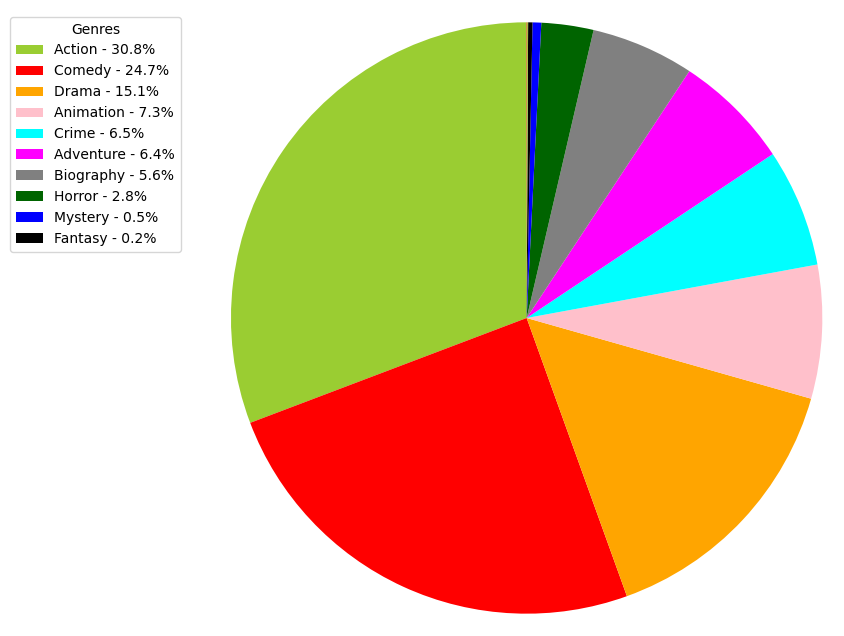

In [12]:

labels = ['Action', 'Comedy', 'Drama', 'Animation', 'Crime', 'Adventure', 'Biography', 'Horror', 'Mystery', 'Fantasy']
colors = ['yellowgreen','red', 'orange','pink', 'cyan','magenta','grey', 'darkgreen', 'blue','black']


genre_count = genre_movies['main_genre'].value_counts()

fig1, ax1 = plt.subplots(figsize=(15, 8))
wedges, texts = plt.pie(genre_count, colors=colors, startangle=90, radius=1.2)
plt.legend(wedges, [f'{label} - {count/sum(genre_count)*100:.1f}%' for label, count in zip(labels, genre_count)], title="Genres", loc="upper left",bbox_to_anchor = (-.35,1))
plt.savefig('../Images/genre_count_pie_chartpng')
plt.show()

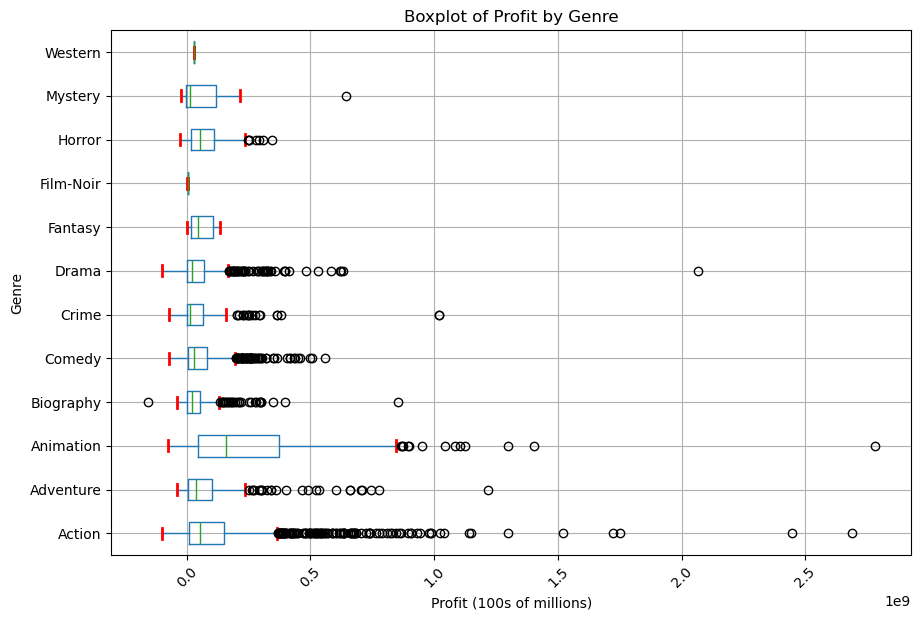

In [13]:
plot = genre_movies.boxplot(by='main_genre', column='profit', figsize=(10, 7), capprops = dict(color = "red", linewidth = 2), vert = False)
plt.title('')
plt.suptitle('')
plot.set_title('')
plt.ylabel('Genre')
plt.xlabel('Profit (100s of millions)')
plt.title('Boxplot of Profit by Genre')
#ax = plot.add_axes([0, 0, 1, 1])

plt.xticks(rotation=45)
#plt.grid(False)

plt.savefig('../Images/genre_profit_boxplot.png')
plot = plt.show()

# Start of Actor Analysis by Sandy

In [61]:
Actors_df = movie_df.copy()

In [62]:
lead_actor = Actors_df[['Lead actor', 'Cast']] = Actors_df['Actors_O'].str.split(',', n=1, expand=True)

lead_actor.head()

,0,1
0,Leonardo DiCaprio,"Joseph Gordon-Levitt, Elliot Page"
1,Matthew McConaughey,"Anne Hathaway, Jessica Chastain"
2,Christian Bale,"Heath Ledger, Aaron Eckhart"
3,Sam Worthington,"Zoe Saldana, Sigourney Weaver"
4,Robert Downey Jr.,"Chris Evans, Scarlett Johansson"


In [63]:
Actors_df['Lead actor'].nunique

<bound method IndexOpsMixin.nunique of 0         Leonardo DiCaprio
1       Matthew McConaughey
2            Christian Bale
3           Sam Worthington
4         Robert Downey Jr.
               ...         
1683        Andrew Garfield
1684        Joaquin Phoenix
1685         Jerry Seinfeld
1686           Heath Ledger
1687             Mike Myers
Name: Lead actor, Length: 1688, dtype: object>

### Actors with most amounts of movies

In [64]:
number_of_unique_cast = len(pd.unique(Actors_df['Lead actor']))
number_of_unique_cast

628

In [65]:
actors_most_movies = Actors_df['Lead actor'].value_counts()

# top occuring actors

actors_most_movies.head()

Lead actor
Johnny Depp          23
Tom Hanks            22
Tom Cruise           22
Leonardo DiCaprio    19
Denzel Washington    19
Name: count, dtype: int64

In [66]:
actors_most_movies.iloc[30:40]

Lead actor
Eddie Murphy          9
Mike Myers            9
Will Ferrell          9
Tom Hardy             9
Harrison Ford         9
Ryan Reynolds         8
Scarlett Johansson    8
Robin Williams        8
Cameron Diaz          8
Joaquin Phoenix       8
Name: count, dtype: int64

In [67]:
# bins with ranges

popularity_bins = pd.cut(actors_most_movies, [0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '20-25'])
popularity_bins

Lead actor
Johnny Depp               20-25
Tom Hanks                 20-25
Tom Cruise                20-25
Leonardo DiCaprio         15-20
Denzel Washington         15-20
                          ...  
Steve Zahn                  0-5
Charlie Cox                 0-5
Elizabeth Olsen             0-5
Donnie Wahlberg             0-5
Philip Seymour Hoffman      0-5
Name: count, Length: 628, dtype: category
Categories (5, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25']

In [68]:
actors_df_bins = pd.DataFrame({'Lead Actor Count': actors_most_movies, 'Popularity Bins': popularity_bins})

# Merge the 'actors df bins' with 'actors_df' on the lead actor column
Actors_merged_df = pd.merge(Actors_df,actors_df_bins, left_on='Lead actor', right_index=True)

# Group the merged DataFrame by the 'Popularity Bins' and calculate the mean box office total for each bin
mean_box_office_per_bin = Actors_merged_df.groupby('Popularity Bins')['profit'].mean()/1_000_000

print(mean_box_office_per_bin)

Popularity Bins
0-5      148.539648
5-10     211.515725
10-15    212.476724
15-20    148.936630
20-25    257.187735
Name: profit, dtype: float64


/var/folders/hs/gpfk35m163v8nk31_7kfcs640000gn/T/ipykernel_19835/478352475.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_box_office_per_bin = Actors_merged_df.groupby('Popularity Bins')['profit'].mean()/1_000_000


### analysis charts

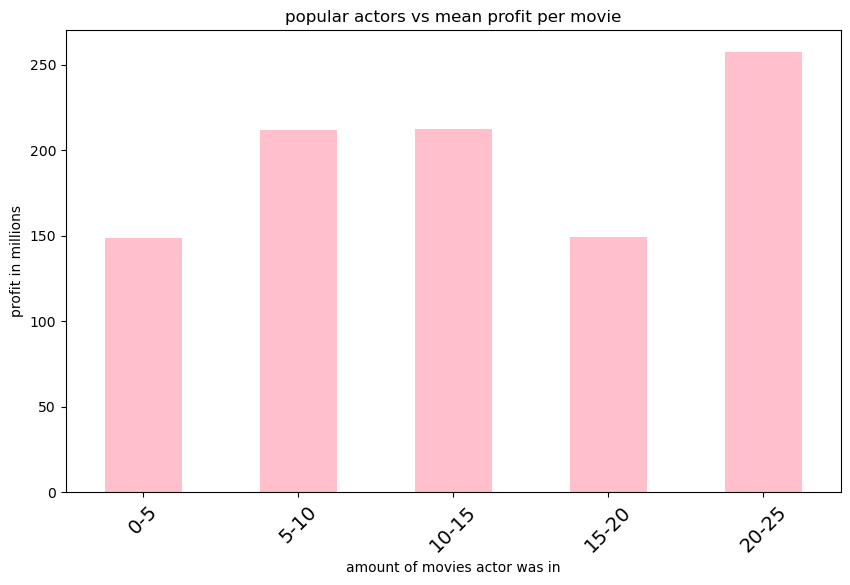

In [69]:
# popular actors vs the average profit per movie bar chart

mean_box_office_per_bin.plot(kind='bar', figsize=(10, 6), color='pink')

# Titles and labels
plt.title('popular actors vs mean profit per movie')
plt.xlabel('amount of movies actor was in')
plt.ylabel('profit in millions')
plt.xticks(fontsize=14, rotation = 45)  

plt.savefig('actor_movie_count_vs_profitpng')

plt.show()

### Analysis

the data shows that Movies by top actors make more money compared to movies by less popular actors. the popularity is determined by how many movies the actor starred in. although there are other cast members we chose to analyze the lead actor since its the first name that's read after the movie title and it would determine if people would pay to watch movies for that specific actor which in turn affects profit.


Actors who have been in more than 20 movies have more average profit per movies, but actors that have starred in less than 20 movies have varying profits
There is a threshold to actor popularity and the profit they make, after they have starred in 20 movies they seem to make more profit than usual actors. actor alone sometimes doesn't determine a movie's profit untill the top 3 out of 628 actors as shown in the data below.

analysis setbacks: not enough clean data to analyze
                   most of the movies relevant enough and available is in the action genre
                   


In [70]:
bin_counts = popularity_bins.value_counts()
bin_counts

count
0-5      559
5-10      41
10-15     16
15-20      9
20-25      3
Name: count, dtype: int64

In [71]:
def convert_to_float(x):
    try:
        if isinstance(x, (int, float)):
            return float(x)
        if isinstance(x, str):
            if '%' in x:
                return float(x.strip('%')) / 100  # Convert to decimal
            return float(x)
    except (ValueError, TypeError):
        return np.nan
    
Actors_df['Rotten_Tomato_O'] = Actors_df['Rotten_Tomato_O'].apply(convert_to_float)
print(Actors_df['Rotten_Tomato_O'])

0       0.87
1       0.73
2       0.94
3       0.82
4       0.91
        ... 
1683    0.83
1684    0.69
1685    0.50
1686    0.71
1687    0.88
Name: Rotten_Tomato_O, Length: 1688, dtype: float64


In [72]:
if Actors_df['Rotten_Tomato_O'].max() <= 1.0:
    Actors_df['Rotten_Tomato_O'] = (Actors_df['Rotten_Tomato_O'] * 100)

# Apply multiplication to 'Rating' if it hasn't been scaled up yet
if Actors_df['Rating'].max() <= 10:
    Actors_df['Rating'] = (Actors_df['Rating'] * 10)

Actors_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,Lead actor,Cast
0,Inception,825532764,160000000,665532764,Action,148.0,2010.0,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",88.0,74.0,87.0,159.0,220.0,Leonardo DiCaprio,"Joseph Gordon-Levitt, Elliot Page"
1,Interstellar,701729206,165000000,536729206,Adventure,169.0,2014.0,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",86.0,74.0,73.0,0.0,0.0,Matthew McConaughey,"Anne Hathaway, Jessica Chastain"
2,The Dark Knight,1004558444,185000000,819558444,Action,152.0,2008.0,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",90.0,84.0,94.0,163.0,164.0,Christian Bale,"Heath Ledger, Aaron Eckhart"
3,Avatar,2923706026,237000000,2686706026,Action,162.0,2009.0,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",78.0,83.0,82.0,91.0,131.0,Sam Worthington,"Zoe Saldana, Sigourney Weaver"
4,The Avengers,1518815515,220000000,1298815515,Action,143.0,2012.0,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",80.0,69.0,91.0,39.0,81.0,Robert Downey Jr.,"Chris Evans, Scarlett Johansson"


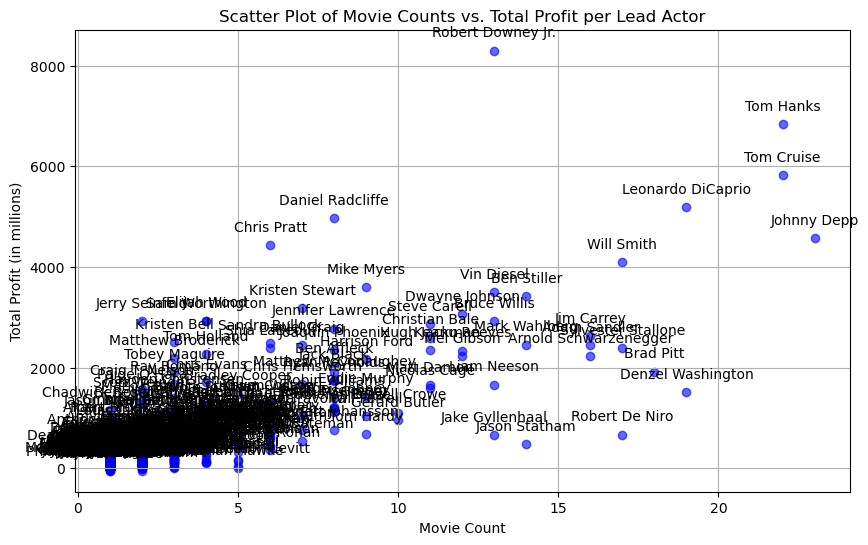

In [73]:
profit_per_actor = Actors_df.groupby('Lead actor')['profit'].sum()

# Merge the counts and profits into a single DataFrame
actors_stats = pd.DataFrame({
    'Movie Count': actors_most_movies,
    'Total Profit': profit_per_actor
}).reset_index()

# Rename columns for clarity
actors_stats.rename(columns={'index': 'Lead Actor'}, inplace=True)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actors_stats['Movie Count'], actors_stats['Total Profit'] / 1_000_000, color='blue', alpha=0.6)

# Label the axes
plt.xlabel('Movie Count')
plt.ylabel('Total Profit (in millions)')
plt.title('Scatter Plot of Movie Counts vs. Total Profit per Lead Actor')

# Annotate points with actor names
for i in range(len(actors_stats)):
    plt.annotate(actors_stats['Lead actor'][i], 
                 (actors_stats['Movie Count'][i], actors_stats['Total Profit'][i] / 1_000_000),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

# Show the plot
plt.grid(True)
plt.show()

### analysis

this scatter plot shows the relationship between popularity and profit Per actor. most of the actors fall on the 0-5 movie counts. robert de niro and denzel washington have high movie counts but they did not make as much profit per movie as will smith who is in the same popularity range. 

# End of Actors Analysis

# Start of Awards Analysis - Stephen Loucel

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import hvplot.pandas
import requests
import random
import os
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import f_oneway


#### Data Frame w/ All Movie Values

In [75]:
# Read in the complete version of the data (Includes NaNs)
movie_start_award_df = pd.read_csv('starting_7351.csv')
movie_start_award_df.shape

(7351, 15)

/var/folders/hs/gpfk35m163v8nk31_7kfcs640000gn/T/ipykernel_19835/3909986596.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_budget_bin = movie_start_award_df.groupby('budget bin')['title'].count()


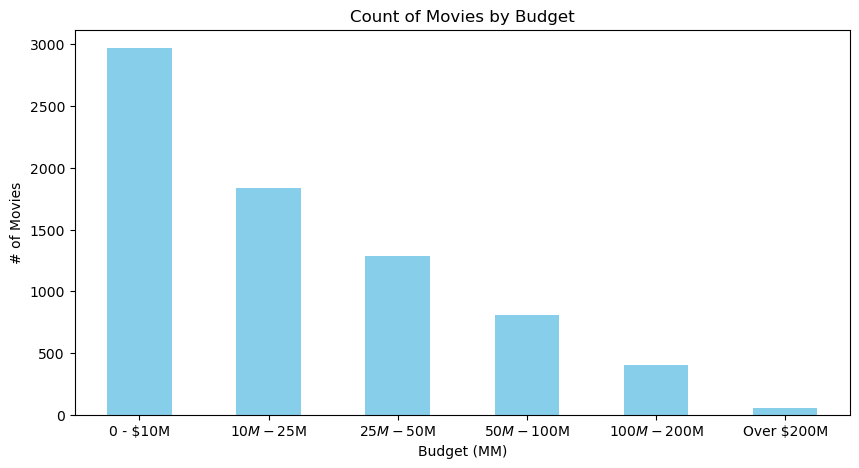

In [76]:
# Number of Movies by Budget Bin
# Setup Bins and Grouping
bins = [0, 10000000, 25000000, 50000000, 100000000, 200000000, 1000000000]
labels = ['0 - $10M', '$10M - $25M', '$25M - $50M', '$50M - $100M', '$100M - $200M', 'Over $200M']
movie_start_award_df['budget bin'] = pd.cut(movie_start_award_df['budget'], bins, labels=labels, right=True, include_lowest=True)
grouped_budget_bin = movie_start_award_df.groupby('budget bin')['title'].count()

# Plot
grouped_budget_bin.plot(kind='bar', figsize=(10, 5), color='skyblue')

# Aesthetics (Titles and Labels)
plt.title('Count of Movies by Budget')
plt.xlabel('Budget (MM)')
plt.ylabel('# of Movies')
plt.xticks(rotation=0) 

plt.savefig('../Images/awa1_movies_by_budget_bin.png')
plt.show()

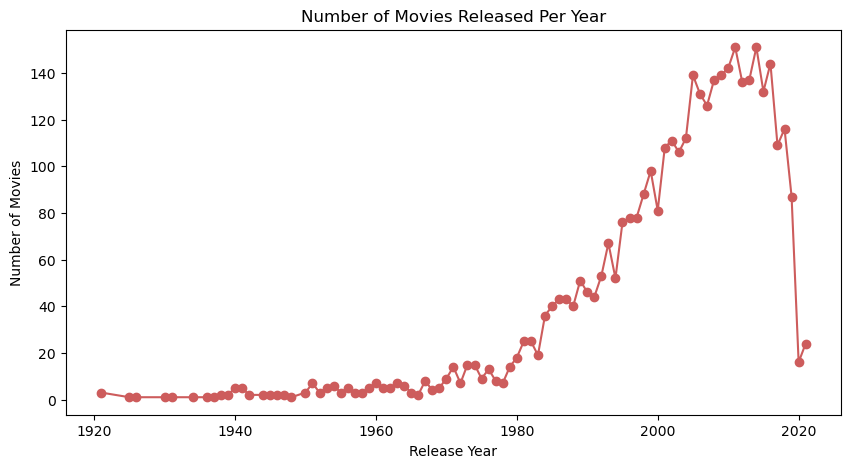

In [77]:
# Number of Movies Released Per Year
# Setup
yearly_movies = movie_start_award_df['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))  
plt.plot(yearly_movies.index, yearly_movies.values, marker='o', linestyle='-', color='indianred')  

# Aesthetics (Titles & Labels)
plt.title('Number of Movies Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(False)  

# plt.savefig('../Images/awa2_movies_released_per_year.png')
plt.show()

#### Data Frame w/ All NaNs Removed

In [78]:
# Read in the cleanest version of the data with no NaNs
movie_final_award_df = pd.read_csv('final_1688.csv')
movie_final_award_df.shape

(1688, 15)

In [79]:
# Code to convert Rotten Tomatoes Rating from and 'object' to a 'float'
def convert_to_float(x):
    try:
        if isinstance(x, (int, float)):
            return float(x)
        if isinstance(x, str):
            if '%' in x:
                return float(x.strip('%')) / 100  # Convert to decimal
            return float(x)
    except (ValueError, TypeError):
        return np.nan
    
movie_final_award_df['Rotten_Tomato_O'] = movie_final_award_df['Rotten_Tomato_O'].apply(convert_to_float)
#print(movie_final_award_df['Rotten_Tomato_O'])


In [80]:
# Get Rotten Tomatoes, Rating, to be the same scale as the Metadata rating so all three ratings can be compared against one another. 
if movie_final_award_df['Rotten_Tomato_O'].max() <= 1.0:
    movie_final_award_df['Rotten_Tomato_O'] = (movie_final_award_df['Rotten_Tomato_O'] * 100)
if movie_final_award_df['Rating'].max() <= 10:
    movie_final_award_df['Rating'] = (movie_final_award_df['Rating'] * 10)

# movie_final_award_df.head(3)

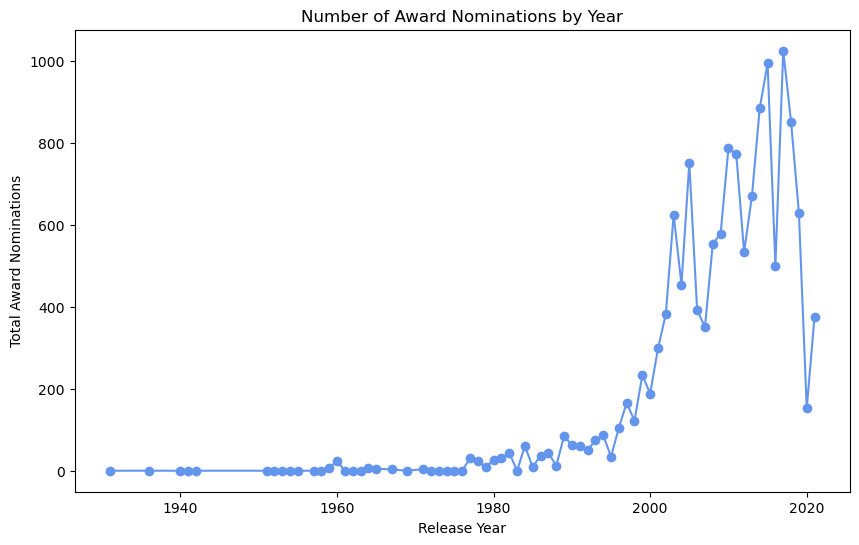

In [81]:
# The number of nominations by year
# Set up
nominations_by_year = movie_final_award_df.groupby('Year')['Award Nominations'].sum()
nominations_by_year = nominations_by_year.reset_index()

# Plot 
plt.figure(figsize=(10, 6)) 
plt.plot(nominations_by_year['Year'], nominations_by_year['Award Nominations'], marker='o', linestyle='-', color='cornflowerblue')

# Aesthetics (Title and Labels)
plt.title('Number of Award Nominations by Year')
plt.xlabel('Release Year')
plt.ylabel('Total Award Nominations')
plt.grid(False)  

plt.savefig('../Images/awa3_movie_nominations_per_year.png')
plt.show()

/var/folders/hs/gpfk35m163v8nk31_7kfcs640000gn/T/ipykernel_19835/1116245955.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = movie_final_award_df.groupby('budget bin')['Award Wins'].agg(sum='sum', mean='mean', count='count')
/var/folders/hs/gpfk35m163v8nk31_7kfcs640000gn/T/ipykernel_19835/1116245955.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(grouped.index, rotation=0)


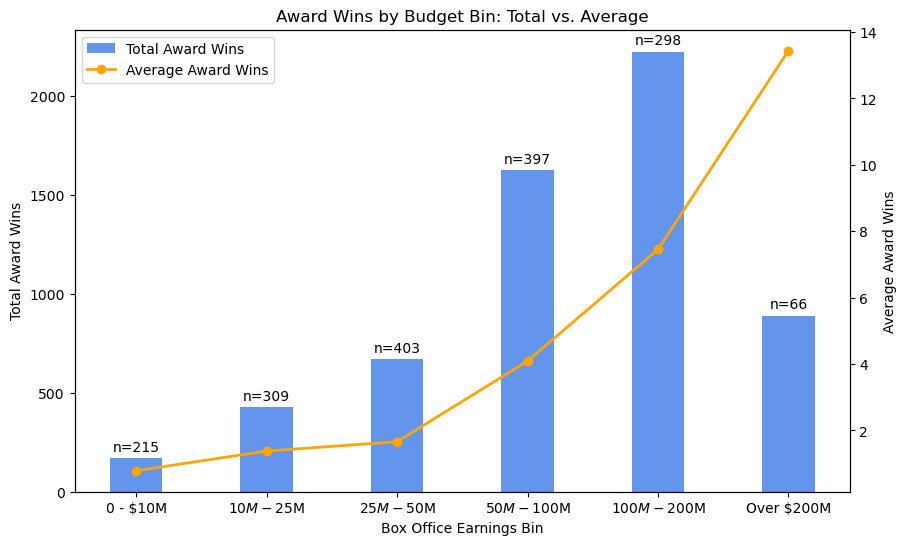

In [82]:
# Awards by Budget Bin
# Setup Bins and Grouping
bins = [0, 10000000, 25000000, 50000000, 100000000, 200000000, 1000000000]
labels = ['0 - $10M', '$10M - $25M', '$25M - $50M', '$50M - $100M', '$100M - $200M', 'Over $200M']
movie_final_award_df['budget bin'] = pd.cut(movie_final_award_df['budget'], bins, labels=labels, right=False, include_lowest=True)
grouped = movie_final_award_df.groupby('budget bin')['Award Wins'].agg(sum='sum', mean='mean', count='count')

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(grouped.index, grouped['sum'], label='Total Award Wins', color='cornflowerblue', width=0.4)

# Annotating bars with the number of movies in the bin
for bar, count in zip(bars, grouped['count']):
    ax.annotate(f'n={count}', 
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom')
    
# Secondary axis
ax2 = ax.twinx()
line = ax2.plot(grouped.index, grouped['mean'], label='Average Award Wins', color='orange', marker='o', linewidth=2)

# Aesthetics (Titles and Labels) 
ax.set_title('Award Wins by Budget Bin: Total vs. Average')
ax.set_xlabel('Box Office Earnings Bin')
ax.set_ylabel('Total Award Wins')
ax2.set_ylabel('Average Award Wins')
ax.set_xticklabels(grouped.index, rotation=0)

# Legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

plt.savefig('../Images/awa4_awards_by_budgetbin.png')
plt.show()

/var/folders/hs/gpfk35m163v8nk31_7kfcs640000gn/T/ipykernel_19835/636188871.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = movie_final_award_df.groupby('budget bin').agg({


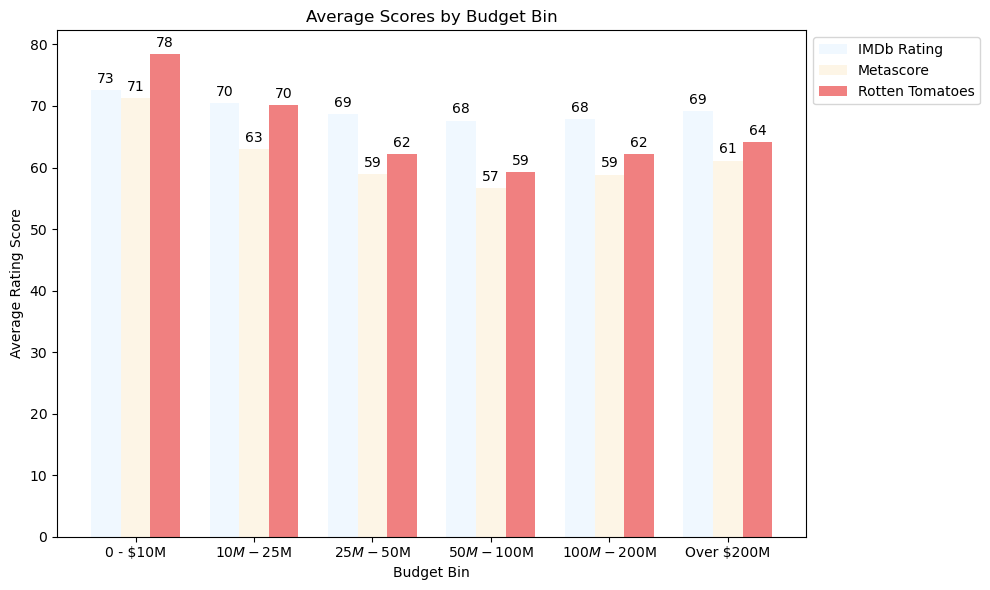

In [83]:
# Group by 'budget bin' and calculate mean for each score
# Setup grouby
mean_scores = movie_final_award_df.groupby('budget bin').agg({
    'Rating': 'mean',
    'Metascore_O': 'mean',
    'Rotten_Tomato_O': 'mean'
}).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25  
x = range(len(mean_scores))
bars1 = ax.bar(x, mean_scores['Rating'], width=width, color='aliceblue', label='IMDb Rating', align='center')
bars2 = ax.bar([p + width for p in x], mean_scores['Metascore_O'], width=width, color='oldlace', label='Metascore', align='center')
bars3 = ax.bar([p + width*2 for p in x], mean_scores['Rotten_Tomato_O'], width=width, color='lightcoral', label='Rotten Tomatoes', align='center')

# Aesthetics (Title and Labels)
ax.set_xlabel('Budget Bin')
ax.set_ylabel('Average Rating Score')
ax.set_title('Average Scores by Budget Bin')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(mean_scores['budget bin'])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Annotating the average values
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)


plt.savefig('../Images/awa5_ratings_by_budgetbin.png')
plt.show()

#### ANOVA Analysis

In [84]:
# ANOVA Analysis to see if ratings by budget bin are statistically significant
# Setup 
variables = ['Rating', 'Metascore_O', 'Rotten_Tomato_O']
results = {}  

for var in variables:
    groups = [group[var].dropna() for name, group in movie_final_award_df.groupby('budget bin')]
    anova_result = f_oneway(*groups)
    results[var] = anova_result
    print(f"F-statistic for {var}: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.25f}")
    if anova_result.pvalue < 0.05:
        print(f"For {var}, the p-value is less than 0.05, we reject the null hypothesis, suggesting significant differences among the groups.")
    else:
        print(f"For {var}, the p-value is not less than 0.05, we fail to reject the null hypothesis, indicating no significant differences among the groups.")

F-statistic for Rating: 13.13, p-value: 0.0000000000014585871183485
For Rating, the p-value is less than 0.05, we reject the null hypothesis, suggesting significant differences among the groups.
F-statistic for Metascore_O: 25.20, p-value: 0.0000000000000000000000014
For Metascore_O, the p-value is less than 0.05, we reject the null hypothesis, suggesting significant differences among the groups.
F-statistic for Rotten_Tomato_O: 22.07, p-value: 0.0000000000000000000018382
For Rotten_Tomato_O, the p-value is less than 0.05, we reject the null hypothesis, suggesting significant differences among the groups.


/var/folders/hs/gpfk35m163v8nk31_7kfcs640000gn/T/ipykernel_19835/3960451133.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[var].dropna() for name, group in movie_final_award_df.groupby('budget bin')]


# End of Awards Analysis

<h1>Start of Director Analysis - JV</h1>

In [ ]:
# Splitting up the string "Directors:" that were found in some rows
movie_df['Director_O'] = movie_df['Director_O'].str.replace('Directors:', '')
movie_df.head()

In [ ]:
#Setting up for Director Analysis
movie_df.rename(columns={'Director_O': 'Director',
                   'Actors_O': 'Actors',
                   'Metascore_O': 'Metascore',
                   "Rotten_Tomato_O": "Rotten_Tomatoes"}, inplace=True)

#Filtering (Cleaning) movie_df for Director Analysis

df_unique = movie_df.drop_duplicates(subset='title', keep='first')
filter_criteria = (
    (df_unique['Metascore'].notna()) &
    (df_unique['revenue'].notna()) &
    (df_unique['Metascore'] != 'Rating not found') &
    (df_unique['revenue'] != 'Box Office not found')
)
clean_director_df = df_unique[filter_criteria]
clean_director_df.info()

In [ ]:
# Create a new column "Director_Type" based on the number of directors
clean_director_df['Director_Type'] = clean_director_df['Director'].apply(lambda x: 'Multiple Directors' if ',' in x else 'Single Director')

# Group the DataFrame by the "Director_Type" column
grouped_director_type = clean_director_df.groupby('Director_Type')

grouped_director_type

In [ ]:
# Identify rows with multiple directors
multiple_directors_mask = clean_director_df['Director'].str.contains(',')

# Split multiple directors into individual values and create new rows
multiple_directors_df = clean_director_df[multiple_directors_mask].copy()
multiple_directors_df['Director'] = multiple_directors_df['Director'].str.split(', ')
multiple_directors_df = multiple_directors_df.explode('Director')

# Combine the original DataFrame with the new rows for multiple directors
updated_director_df = pd.concat([clean_director_df[~multiple_directors_mask], multiple_directors_df], ignore_index=True)

In [ ]:
director_counts = updated_director_df['Director_Type'].value_counts()
plt.bar(director_counts.index, director_counts.values)
plt.xlabel('Director Type')
plt.ylabel('Number of Movies')
plt.title('Movies Directed by Single Director vs. Multiple Directors')

plt.savefig("../Images/JV_Fig1_MovieCount_by_DirectorGroup.png")

plt.show()

single_director_percent = 1431 / 1760 * 100
rounded_single = round(single_director_percent, 2)
multiple_director_percent = 329 / 1760 * 100
rounded_multiple = round(multiple_director_percent, 2)
print(f"Of the ~1760 movies, {rounded_single}% were directed by an individual director, whereas {rounded_multiple}% were directed by multiple directors")


In [ ]:
# Separate the data for Single Directors and Multiple Directors
single_directors_ratings = updated_director_df[updated_director_df['Director_Type'] == 'Single Director']['Metascore']
multiple_directors_ratings = updated_director_df[updated_director_df['Director_Type'] == 'Multiple Directors']['Metascore']

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([single_directors_ratings, multiple_directors_ratings], labels=['Single Directors', 'Multiple Directors'])
plt.xlabel('Director Type')
plt.ylabel('Metascore')
plt.title('Boxplot of Metascore Ratings by Director Type')
plt.savefig("../Images/JV_Fig2_Metascore_by_DirectorGroup.png")
plt.show()
# Not sure if this is something noteable, but I'll save it just in case. Mean rating (red line) for Single Directors is 6.75, 
# while the mean rating for multiple directors is 6.84.
single_mean_score = round(single_directors_ratings.mean(),2)
multiple_mean_score = round(multiple_directors_ratings.mean(),2)
t_stat, p_value = stats.ttest_ind(single_directors_ratings,multiple_directors_ratings)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis. There IS a significant difference in Metascore Ratings of movies directed by individuals vs. movies directed by a group of people")
else:
    print("Retain Null Hypothesis. There IS NOT a significant difference in Metascore Ratings between movies directed by single directors vs. multiple directors")
print(f"The mean score for movies directed by an individual was {single_mean_score}/100, whereas the mean score for movies directed by multiple directors was {multiple_mean_score}/100")



In [ ]:
# Top Directors dataframe
clean_director_df['Director']

# Split directors in cells containing multiple directors into separate rows
directors_df = clean_director_df['Director'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Director')

# Count the occurrences of each director
director_counts = directors_df.value_counts()

# Sort the directors based on the number of movies they have made
most_movies_directors = director_counts.head()


# Display the directors who made the most movies
most_movies_directors_df = most_movies_directors.reset_index()
most_movies_directors_df.columns = ['Director', 'Total Movies Directed']
most_movies_directors_df

In [ ]:
# Plotting the directors who made the most movies as a bar chart
plt.figure(figsize=(10, 6))
most_movies_directors.plot(kind='bar', color='skyblue')
plt.title('Directors Who Made the Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar chart
plt.savefig("../Images/JV_Fig3_Top5Directors.png")
plt.show();

In [ ]:
top_directors = ['Steven Spielberg', 'Tim Burton', 'Robert Zemeckis', 'Martin Scorsese', 'Michael Bay']

#Some directors were still "coupled together" from the Multiple Directors group. I'm separating them here
top_directors_df = clean_director_df[clean_director_df['Director'].str.contains('|'.join(top_directors))].sort_values(by='Director')
top_directors_df_clean = top_directors_df.assign(Director=top_directors_df['Director'].str.split(', ')).explode('Director')

In [ ]:
# List of the top 5 directors
top_directors = ['Steven Spielberg', 'Tim Burton', 'Robert Zemeckis', 'Martin Scorsese', 'Michael Bay']

# Create a new DataFrame with rows that match the top directors
top_directors_df = clean_director_df[clean_director_df['Director'].str.contains('|'.join(top_directors))].sort_values(by='Director')

# Display the new DataFrame
top_directors_df_clean = top_directors_df.assign(Director=top_directors_df['Director'].str.split(', ')).explode('Director')

# List of directors to remove
directors_to_remove = ['Don Siegel', 'Mike Johnson']

# Filter out the directors to remove from the DataFrame
top_directors_filtered = top_directors_df_clean[~top_directors_df['Director'].isin(directors_to_remove)]

# Create a vertical box plot for the average revenue data of the top directors
plt.figure(figsize=(12, 8))
plt.boxplot([top_directors_filtered[top_directors_filtered['Director'] == director]['revenue'] for director in top_directors],
            labels=top_directors)
plt.xticks(rotation=45)
plt.xlabel('Top Directors')
plt.ylabel('Average Movie Revenue')
plt.title('Average Movie Revenue for Top 5 Directors')

plt.savefig("../Images/JV_Fig4_Revenue_by_Top5.png")
plt.show()

for director in top_directors:
    avg_revenue = top_directors_filtered.loc[top_directors_filtered['Director'] == director, 'revenue'].values[0]
    formatted_avg_revenue = "${:,.2f}".format(avg_revenue)
    print(f"Director: {director}, Average Revenue: {formatted_avg_revenue}")

In [ ]:
# Getting the mean metascore by director using groupby
top_directors_df = clean_director_df[clean_director_df['Director'].isin(top_directors)]

mean_metascore_by_director = top_directors_df.groupby('Director')['Metascore'].mean()
mean_metascore_by_director

# Data for mean Metascore per director to be used for Bar Graph
mean_director_metascores = mean_metascore_by_director.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(top_directors, mean_director_metascores, color='skyblue')
plt.xlabel('Director')
plt.ylabel('Mean Metascore')
plt.title('Mean Metascore per Director')
plt.xticks(rotation=45)

# Showing a horizontal line of the mean metascore of all movies in the clean_director_df
plt.axhline(y=60.58, color='r', linestyle=':', label='Overall Mean Metascore = 60.58')
plt.legend()

# Labelling each Bar with its corresponding Metascore value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', ha='center', fontsize=12)

plt.gcf().set_size_inches(8, 10)
plt.savefig("../Images/JV_Fig5_Metascore_Top5.png")
plt.show();


<h1>End of Director Analysis</h1>

<h1>Start of Budget Analysis</h1>

In [20]:
import pandas as pd
from pathlib import Path
import csv
import requests
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pathlib import Path

image_directory = Path("../Images")

mb_data = Path("../jeff_analysis/final_1688.csv")
budget_analysis_main_df = pd.read_csv(mb_data)
budget_analysis_main_df.info()
budget_analysis_main_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1688 non-null   object 
 1   revenue            1688 non-null   int64  
 2   budget             1688 non-null   int64  
 3   profit             1688 non-null   int64  
 4   main_genre         1688 non-null   object 
 5   Runtime(Mins)      1688 non-null   int64  
 6   Year               1688 non-null   int64  
 7   original_language  1688 non-null   object 
 8   Director_O         1685 non-null   object 
 9   Actors_O           1688 non-null   object 
 10  Rating             1688 non-null   float64
 11  Metascore_O        1688 non-null   int64  
 12  Rotten_Tomato_O    1688 non-null   float64
 13  Award Wins         1688 non-null   int64  
 14  Award Nominations  1688 non-null   int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 197.9+ KB


Index(['title', 'revenue', 'budget', 'profit', 'main_genre', 'Runtime(Mins)',
       'Year', 'original_language', 'Director_O', 'Actors_O', 'Rating',
       'Metascore_O', 'Rotten_Tomato_O', 'Award Wins', 'Award Nominations'],
      dtype='object')

In [3]:
import pandas as pd

bins = [0, 15100000, 32100000, 57100000, 100100000, 380000000]
groups = ["bin 1", "bin 2", "bin 3", "bin 4", "bin 5"]

budget_analysis_main_df['bin_labels'] = pd.cut(budget_analysis_main_df['budget'], bins=bins, labels=groups, right=False)

budget_analysis_main_df.head()


,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,bin_labels
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,0.87,159,220,bin 5
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,0.73,0,0,bin 5
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,0.94,163,164,bin 5
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,0.82,91,131,bin 5
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,0.91,39,81,bin 5


In [4]:
budget_analysis_main_df.rename(columns={"bin_labels": "budget_bins"}, inplace=True)
budget_analysis_main_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,0.87,159,220,bin 5
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,0.73,0,0,bin 5
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,0.94,163,164,bin 5
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,0.82,91,131,bin 5
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,0.91,39,81,bin 5


In [5]:
rating = budget_analysis_main_df["Rotten_Tomato_O"] < 1.01
budget_analysis_main_df.loc[rating, 'Rotten_Tomato_O'] = (budget_analysis_main_df.loc[rating, 'Rotten_Tomato_O'] * 100).astype(int)
budget_analysis_main_df['Rotten_Tomato_O'] = budget_analysis_main_df['Rotten_Tomato_O'].astype(int)
budget_analysis_main_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,87,159,220,bin 5
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,73,0,0,bin 5
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,94,163,164,bin 5
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,82,91,131,bin 5
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,91,39,81,bin 5


In [6]:
import pandas as pd

bins = [0, 60, 70, 80, 90, 101]
groups = ["F", "D", "C", "B", "A"]

budget_analysis_main_df['RT_bin'] = pd.cut(budget_analysis_main_df['Rotten_Tomato_O'], bins=bins, labels=groups, right=False)
budget_analysis_main_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins,RT_bin
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,87,159,220,bin 5,B
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,73,0,0,bin 5,C
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,94,163,164,bin 5,A
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,82,91,131,bin 5,B
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,91,39,81,bin 5,A


In [7]:
import pandas as pd

bins = [0, 60, 70, 80, 90, 101]
groups = ["F", "D", "C", "B", "A"]

budget_analysis_main_df['Meta_bin'] = pd.cut(budget_analysis_main_df['Metascore_O'], bins=bins, labels=groups, right=False)
budget_analysis_main_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins,RT_bin,Meta_bin
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,87,159,220,bin 5,B,C
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,73,0,0,bin 5,C,C
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,94,163,164,bin 5,A,B
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,82,91,131,bin 5,B,B
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,91,39,81,bin 5,A,D


In [8]:
count_f_by_bin = budget_analysis_main_df[budget_analysis_main_df["RT_bin"] == "F"].groupby("budget_bins").size()
print(count_f_by_bin)
count_a_by_bin = budget_analysis_main_df[budget_analysis_main_df["RT_bin"] == "A"].groupby("budget_bins").size()
print(count_a_by_bin)

budget_bins
bin 1     78
bin 2    109
bin 3    152
bin 4    155
bin 5    138
dtype: int64
budget_bins
bin 1    130
bin 2     61
bin 3     39
bin 4     33
bin 5     60
dtype: int64


C:\Users\stoyt\AppData\Local\Temp\ipykernel_11100\1249557884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_f_by_bin = budget_analysis_main_df[budget_analysis_main_df["RT_bin"] == "F"].groupby("budget_bins").size()
C:\Users\stoyt\AppData\Local\Temp\ipykernel_11100\1249557884.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_a_by_bin = budget_analysis_main_df[budget_analysis_main_df["RT_bin"] == "A"].groupby("budget_bins").size()


In [9]:
budget_analysis_main_df = budget_analysis_main_df.assign(weighted_profit=lambda x: (x['profit'] / x['budget']).round(2))
budget_analysis_main_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins,RT_bin,Meta_bin,weighted_profit
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,87,159,220,bin 5,B,C,4.16
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,73,0,0,bin 5,C,C,3.25
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,94,163,164,bin 5,A,B,4.43
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,82,91,131,bin 5,B,B,11.34
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,91,39,81,bin 5,A,D,5.90



ANOVA results for Meta:
F-statistic: 29.972895664031878
p-value: 4.04502686751637e-24

ANOVA result for RT:
F-statistic: 29.73821961517758
p-value: 6.224744299142306e-24


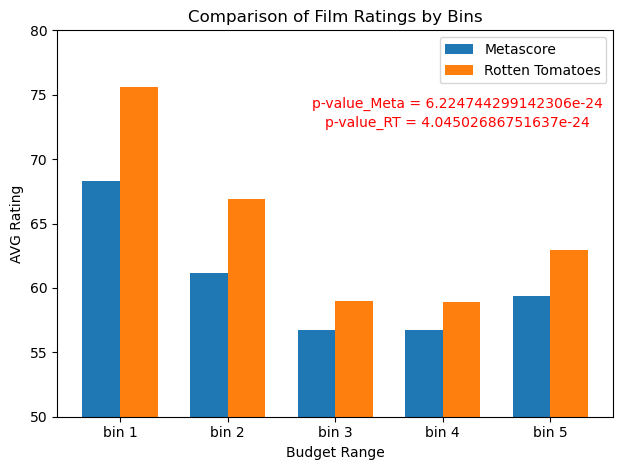

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway

bins = sorted(budget_analysis_main_df["budget_bins"].unique())
mean_by_meta = budget_analysis_main_df.groupby("budget_bins")["Metascore_O"].mean()
mean_by_RT = budget_analysis_main_df.groupby("budget_bins")["Rotten_Tomato_O"].mean()

mean_by_RT = budget_analysis_main_df.groupby("budget_bins")["Rotten_Tomato_O"].mean()

overall_RT_mean = round(budget_analysis_main_df["Rotten_Tomato_O"].mean(), 2)

groups = [budget_analysis_main_df[budget_analysis_main_df["budget_bins"] == bin_value]["Rotten_Tomato_O"] for bin_value in budget_analysis_main_df["budget_bins"].unique()]

f_statistic_RT, p_value_RT = f_oneway(*groups)

print("\nANOVA results for Meta:")
print("F-statistic:", f_statistic_RT)
print("p-value:", p_value_RT)

mean_by_meta = budget_analysis_main_df.groupby("budget_bins")["Metascore_O"].mean()

overall_meta_mean = round(budget_analysis_main_df["Metascore_O"].mean(), 2)

groups = [budget_analysis_main_df[budget_analysis_main_df["budget_bins"] == bin_value]["Metascore_O"] for bin_value in budget_analysis_main_df["budget_bins"].unique()]

f_statistic_M, p_value_M = f_oneway(*groups)

print("\nANOVA result for RT:")
print("F-statistic:", f_statistic_M)
print("p-value:", p_value_M)

bar_width = 0.35

x = np.arange(len(bins))

plt.bar(x - bar_width/2, mean_by_meta, bar_width, label='Metascore')

plt.bar(x + bar_width/2, mean_by_RT, bar_width, label='Rotten Tomatoes')

plt.xlabel('Budget Range')
plt.ylabel('AVG Rating')
plt.ylim(50, 80)
plt.title('Comparison of Film Ratings by Bins')
plt.xticks(x, bins)
plt.legend()

plt.annotate(f'p-value_Meta = {p_value_M}', xy=(0.72, 0.8), xycoords='axes fraction', ha='center', color= "red")
plt.annotate(f'p-value_RT = {p_value_RT}', xy=(0.72, 0.75), xycoords='axes fraction', ha='center', color= "red")

plt.tight_layout()

image_name = "Meta and RT ratings by budget_bin.png"
image_path = image_directory / image_name
plt.savefig(image_path)

plt.show()

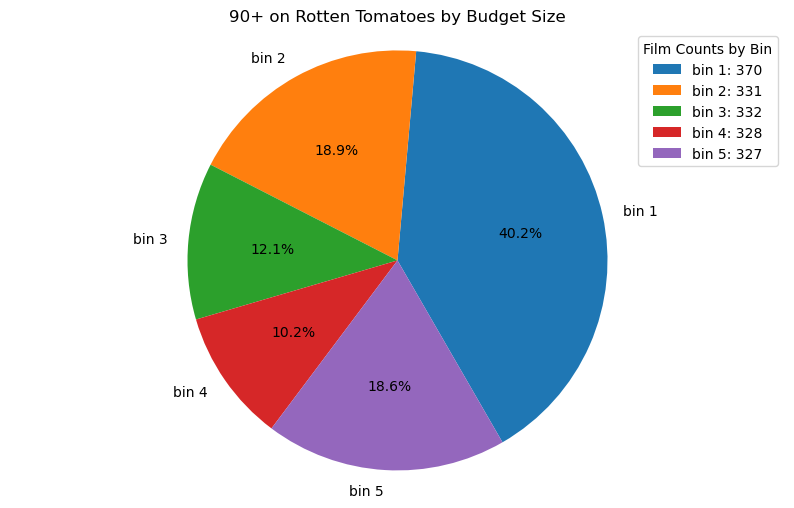

In [27]:
import matplotlib.pyplot as plt

budget_bin_count = budget_analysis_main_df.groupby("budget_bins").size()

# Assuming count_a_by_bin is your Series containing the counts
labels = count_a_by_bin.index  # Budget bins as labels
sizes = count_a_by_bin.values  # Counts as sizes

# Plotting the pie chart with adjusted subplot size
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=300)
ax.set_title('90+ on Rotten Tomatoes by Budget Size')
ax.axis('equal')

# Adding legend showing total film counts by budget bin
legend_labels = ['{}: {}'.format(label, size) for label, size in zip(labels, budget_bin_count)]
ax.legend(legend_labels, title="Film Counts by Bin", loc='upper right')

image_name = "Movies scoring 90+ on RT by budget_bin.png"
image_path = image_directory / image_name

plt.savefig(image_path)

plt.show()



C:\Users\stoyt\AppData\Local\Temp\ipykernel_11100\3118633298.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_main_df.groupby("budget_bins").size()


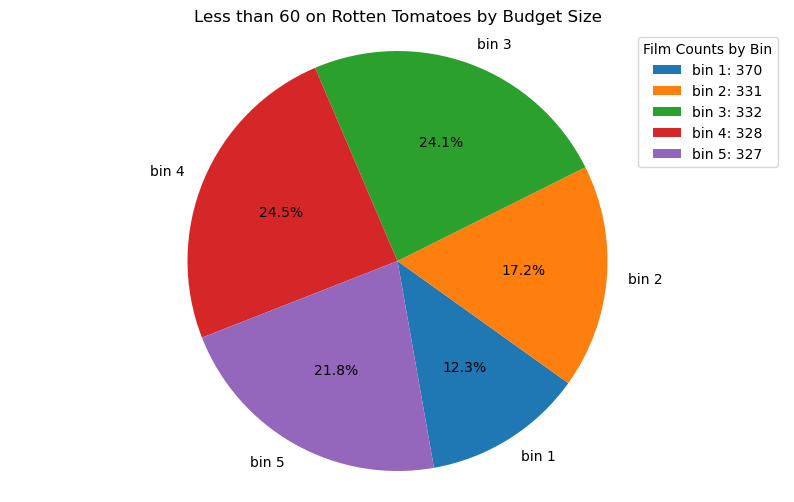

In [12]:
import matplotlib.pyplot as plt

budget_bin_count = budget_analysis_main_df.groupby("budget_bins").size()


labels = count_f_by_bin.index 
sizes = count_f_by_bin.values 

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=280)
ax.set_title('Less than 60 on Rotten Tomatoes by Budget Size')
ax.axis('equal')

legend_labels = ['{}: {}'.format(label, size) for label, size in zip(labels, budget_bin_count)]
ax.legend(legend_labels, title="Film Counts by Bin", loc='upper right')

plt.show()

F-statistic: 3.7937682806610082
p-value: 0.00446650728418559


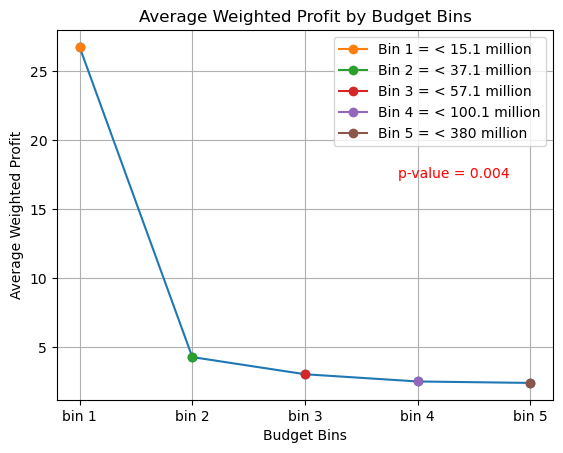

In [28]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

prof_mean_bybin = budget_analysis_main_df.groupby("budget_bins")["weighted_profit"].mean()
budget_bins_labels = ["< 15.1 million", "< 37.1 million", "< 57.1 million", "< 100.1 million", "< 380 million"]

groups = []
for group_name, group_data in budget_analysis_main_df.groupby("budget_bins")["weighted_profit"]:
    groups.append(group_data)

# Perform ANOVA
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Plotting
plt.plot(prof_mean_bybin.index, prof_mean_bybin.values, marker='o', linestyle='-')
plt.title('Average Weighted Profit by Budget Bins')
plt.xlabel('Budget Bins')
plt.ylabel('Average Weighted Profit')

for i, bin_label in enumerate(budget_bins_labels):
    plt.plot(prof_mean_bybin.index[i], prof_mean_bybin.values[i], marker='o', linestyle='-', label=f'Bin {i+1} = {bin_label}')

plt.annotate(f'p-value = {p_value:.3f}', xy=(0.8, 0.6), xycoords='axes fraction', ha='center', color= "red")


plt.legend()
plt.grid(True)

image_name = "Weighted_profit by budget_bin.png"
image_path = image_directory / image_name

plt.savefig(image_path)

plt.show()


In [29]:
#The absurdly high weighted_profit of Horror movies in bin 1 strongly suggests a sampling bias that, while almost undoubtedly rooted in truth to a
#good degree, nonetheless could be skewing the data.

com_mean = budget_analysis_main_df.groupby(["main_genre", "budget_bins"])["weighted_profit"].agg(['mean', 'count'])
com_mean_df = com_mean.reset_index()
com_mean_horror = com_mean_df.loc[com_mean_df["main_genre"] == "Horror", :]

print(com_mean_horror)

   main_genre budget_bins        mean  count
40     Horror       bin 1  171.014118     34
41     Horror       bin 2    5.521429     14
42     Horror       bin 3    2.895000      8
43     Horror       bin 4   -0.380000      1
44     Horror       bin 5         NaN      0


F-statistic: 121.70285978236498
p-value: 2.6851121768272256e-91


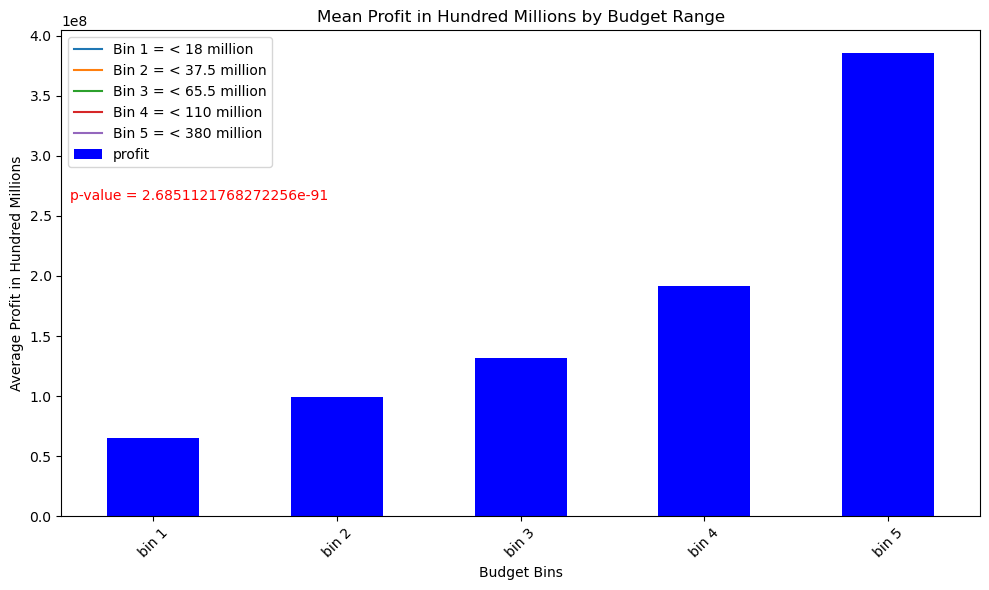

In [30]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Sample data
total_profit_mean_bybin = budget_analysis_main_df.groupby("budget_bins")["profit"].mean().astype(int)
budget_bin_labels = ["< 18 million", "< 37.5 million", "< 65.5 million", "< 110 million", "< 380 million"]

groups = []
for group_name, group_data in budget_analysis_main_df.groupby("budget_bins")["profit"]:
    groups.append(group_data)

# Perform ANOVA
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Plotting
plt.figure(figsize=(10, 6))
bars = total_profit_mean_bybin.plot(kind='bar', color='blue')
plt.xlabel("Budget Bins")
plt.ylabel("Average Profit in Hundred Millions")
plt.title("Mean Profit in Hundred Millions by Budget Range")
plt.xticks(rotation=45)

for i, bin_label in enumerate(budget_bin_labels):
    plt.plot(prof_mean_bybin.index[i], prof_mean_bybin.values[i], label=f'Bin {i+1} = {bin_label}')

plt.annotate(f'p-value = {p_value}', xy=(0.15, 0.65), xycoords='axes fraction', ha='center', color= "red")

plt.legend()


plt.tight_layout()
image_name = "Overall profit by budget_bin.png"
image_path = image_directory / image_name

plt.savefig(image_path)

plt.show()


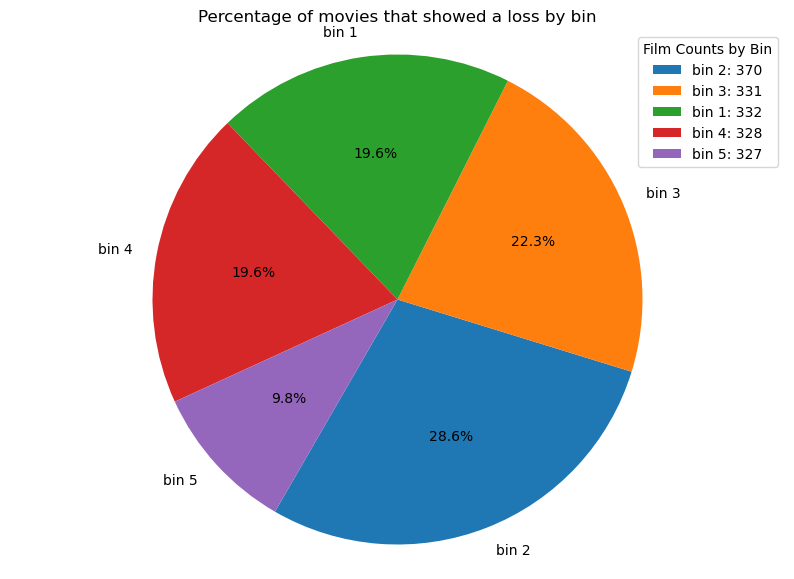

In [31]:
import matplotlib.pyplot as plt

profit_loss = budget_analysis_main_df.loc[budget_analysis_main_df["profit"] < 0, :]
movie_counts_by_bin_loss = profit_loss["budget_bins"].value_counts()

budget_bin_count = budget_analysis_main_df.groupby("budget_bins").size()

labels = movie_counts_by_bin_loss.index 
sizes = movie_counts_by_bin_loss.values 

# Plotting the pie chart with adjusted subplot size
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=240)
ax.set_title('Percentage of movies that showed a loss by bin')
ax.axis('equal')

# Adding legend showing total film counts by budget bin
legend_labels = ['{}: {}'.format(label, size) for label, size in zip(labels, budget_bin_count)]
ax.legend(legend_labels, title="Film Counts by Bin", loc='upper right')

image_name = "Breakdown of movies showing a loss by budget_bin.png"
image_path = image_directory / image_name

plt.savefig(image_path)

plt.show()

In [18]:
#Running a chi square on the distribution of profit_loss movies across budget ranges
import scipy.stats as stats

profit_loss = budget_analysis_main_df.loc[budget_analysis_main_df["profit"] < 0, :]
movie_counts_by_bin_loss = profit_loss["budget_bins"].value_counts()
chi_bins_df = pd.DataFrame(movie_counts_by_bin_loss)
chi_bins_df.columns = ["actual"]
chi_bins_df["expected"] = 22.4

chi_square_stat, p_value = stats.chisquare(chi_bins_df['actual'], chi_bins_df['expected'])
critical_value = stats.chi2.ppf(q = 0.95, df = 4)

print("Chi-Square Statistic:", chi_square_stat)
print("p-value:", p_value)
print("Critical Value (95% confidence):", critical_value)

Chi-Square Statistic: 10.232142857142858
p-value: 0.03669365373581537
Critical Value (95% confidence): 9.487729036781154


In [19]:
#A Python function to quickly return some relevant metrics by genre to begin to analyze the relationship between budget and performance by genre

def genre_stats(genre):
    genre_profit = budget_analysis_main_df.loc[budget_analysis_main_df["main_genre"] == genre, :]
    genre_count = genre_profit["main_genre"].count()
    genre_profit_budget = round(genre_profit["budget"].mean(),2)
    genre_profit_revenue = round(genre_profit["revenue"].mean(), 2)
    genre_profit_weighted = round(genre_profit_revenue/genre_profit_budget, 2)
    
    return f"AVG Budget: {genre_profit_budget}\n AVG Revenue: {genre_profit_revenue}\n Weighted Profit: {genre_profit_weighted}\n Count: {genre_count}"

print(genre_stats("Comedy"))

AVG Budget: 32696257.24
 AVG Revenue: 149683099.33
 Weighted Profit: 4.58
 Count: 283


Slope: -0.0000006801


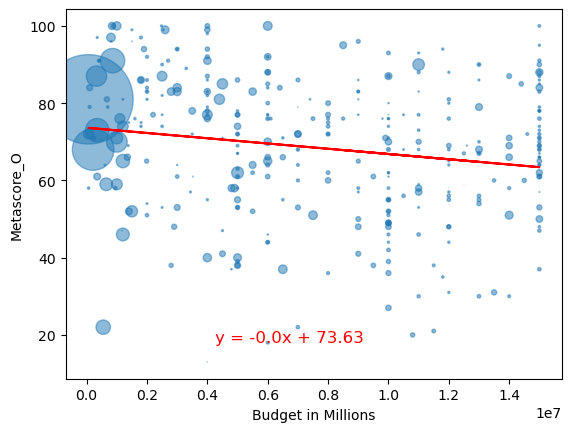

In [21]:
from scipy.stats import linregress
bin_1_data = budget_analysis_main_df[budget_analysis_main_df["budget_bins"] == "bin 1"]
x_values = bin_1_data["budget"]
y_values = bin_1_data["Metascore_O"]
profit_bin_1 = bin_1_data["weighted_profit"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, s=profit_bin_1, alpha=0.5)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0.3, 0.1), xycoords='axes fraction', fontsize=12, color="red")
plt.xlabel('Budget in Millions')
plt.ylabel('Metascore_O')
print(f"Slope: {slope:.10f}")
plt.show()

Slope: 0.0000000508


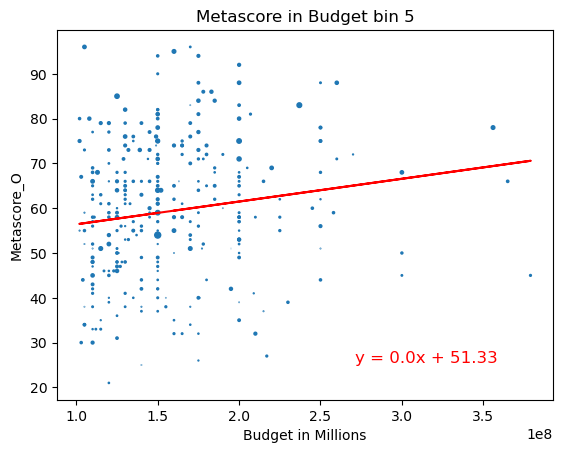

In [22]:
from scipy.stats import linregress

bin_5_data = budget_analysis_main_df[budget_analysis_main_df["budget_bins"] == "bin 5"]

budget_bin_5 = bin_5_data["budget"]
score_bin_5 = bin_5_data["Metascore_O"]
profit_bin_5 = bin_5_data["weighted_profit"]

# Add the linear regression equation and line to plot
x_values = budget_bin_5
y_values = score_bin_5
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, s=profit_bin_5, alpha=0.99999999)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0.6, 0.1), xycoords='axes fraction', fontsize=12, color="red")
plt.title("Metascore in Budget bin 5")
plt.xlabel('Budget in Millions')
plt.ylabel('Metascore_O')
print(f"Slope: {slope:.10f}")

Slope: -0.0000000306


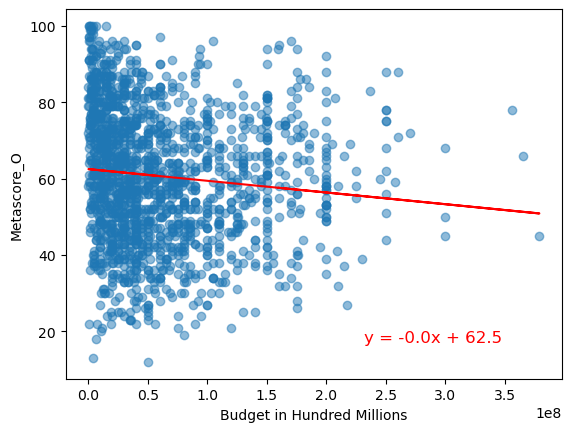

In [32]:
from scipy.stats import linregress

budget_data = budget_analysis_main_df["budget"]
score_data = budget_analysis_main_df["Metascore_O"]
profit_data = budget_analysis_main_df["weighted_profit"]

# Add the linear regression equation and line to plot
x_values = budget_data
y_values = score_data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0.6, 0.1), xycoords='axes fraction', fontsize=12, color="red")
plt.xlabel('Budget in Hundred Millions')
plt.ylabel('Metascore_O')
print(f"Slope: {slope:.10f}")

image_name = "Metascore across all budget_bins.png"
image_path = image_directory / image_name

plt.savefig(image_path)

plt.show()

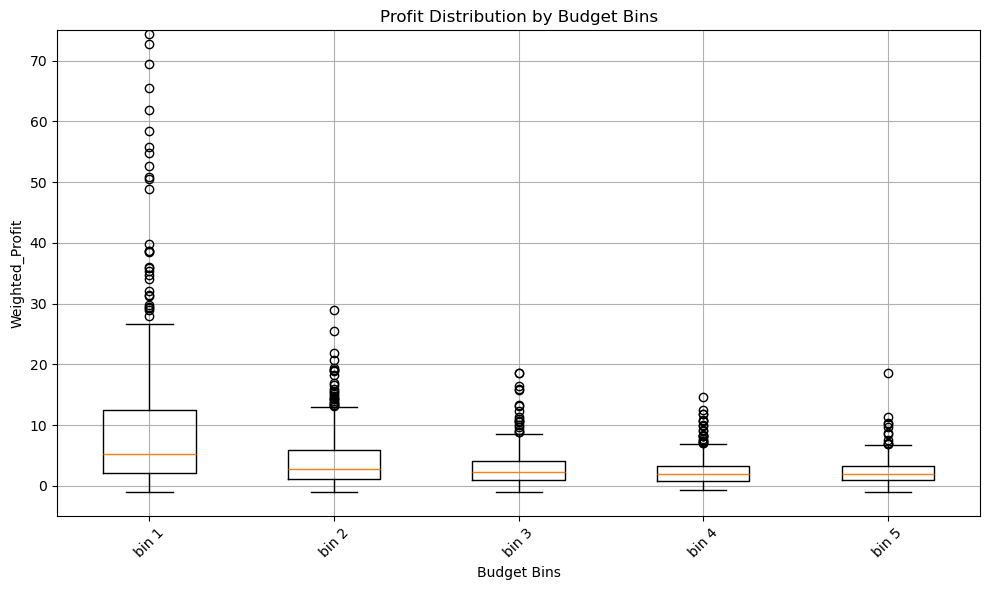

In [33]:
import matplotlib.pyplot as plt

data = budget_analysis_main_df.groupby("budget_bins")["weighted_profit"].apply(list)

# Plotting the box plots
plt.figure(figsize=(10, 6))

# Create box plots
plt.boxplot(data.values)

# Set labels and title
plt.xlabel("Budget Bins")
plt.ylabel("Weighted_Profit")
plt.ylim(-5, 75)
plt.title("Profit Distribution by Budget Bins")
plt.xticks(range(1, len(data) + 1), data.index)  # Set x-ticks as bin labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

image_name = "Boxplot of weighted_profit across budget_bins.png"
image_path = image_directory / image_name

plt.savefig(image_path)

plt.show()


In [25]:
for i, (bin_label, bin_data) in enumerate(data.items()):
    quartiles = pd.Series(bin_data).quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f"Bin {bin_label}:")
    print(f"The lower quartile of data is: {lowerq}")
    print(f"The upper quartile of data is: {upperq}")
    print(f"The interquartile range of data is: {iqr}")
    print(f"The the median of data is: {quartiles[0.5]}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

plt.tight_layout()
plt.show()

Bin bin 1:
The lower quartile of data is: 2.14
The upper quartile of data is: 12.4275
The interquartile range of data is: 10.2875
The the median of data is: 5.285
Values below -13.291249999999998 could be outliers.
Values above 27.85875 could be outliers.
Bin bin 2:
The lower quartile of data is: 1.06
The upper quartile of data is: 5.85
The interquartile range of data is: 4.789999999999999
The the median of data is: 2.76
Values below -6.124999999999998 could be outliers.
Values above 13.034999999999998 could be outliers.
Bin bin 3:
The lower quartile of data is: 1.0175
The upper quartile of data is: 4.130000000000001
The interquartile range of data is: 3.1125000000000007
The the median of data is: 2.21
Values below -3.651250000000001 could be outliers.
Values above 8.798750000000002 could be outliers.
Bin bin 4:
The lower quartile of data is: 0.87
The upper quartile of data is: 3.2824999999999998
The interquartile range of data is: 2.4124999999999996
The the median of data is: 1.875
Va

<Figure size 640x480 with 0 Axes>

Brief Budget Data Analysis:

Anova tests on the ratings measurements in the established budget ranges did allow for a rejection of the null hypothesis.  Thus, it would appear at least preliminarily that lower budget movies did exceed their counterparts on both Rotten Tomatoes and Metascore.  No testing was done as regards the validity of Rotten Tomatoes versus Metascore, but the bar chart did interestingly show a similar shape in the data.  Moviegoers did rate lower budget movies more highly than higher budget movies as did critics (Metascore).  The Metascore ratings showed a similar disposition with the only difference being Metascores were typically lower while following a similar pattern.

Testing on profitibility once again allowed for the rejection of the null hypothesis with lower budget movies showing an almost ridiculous derivation from the other bins in this sample in weighted_profit (profit / budget).  This number was perhaps skewed by the performance of Horror movies in bin 1 as movies in that data set showed a weighted_profit of just over 171.  Obviously, that number suggests a bias in the sample and does suggest that outrageously successful horror movies were oversampled in the data set used for this analysis.  Still, I would expect for the overall trend of lower budget movies performing well and far outdistancing higher budget movies in this metric to persist across different data sets.

Overall profit expressed as a total dollar amount greatly explained the existence of blockbuster films.  This metric followed a far more linear progression with bin 5 movies (highest budget) producing an average profit five times greater than the average returned by movies in bin 1 (which again were perhaps inordinately successful lower budget movies when taken against an overall norm).  Moreover, each successive bin moving up from bin 1 saw a clear increase in overall profitability.  Finally, an interesting note as it was found that the highest budget range movies not only produced the highest gross profit, but also showed the least likelihood of showing a loss.  Movies that lost money were fairly evenly distributed among the first four bins, but it was the highest bin that contained the fewest amount of films that actually lost money.  So, they are highly profitable and it would seem, a fairly safe investment.  A chi square was performed on the distribution of movies (count) in the budget bins and a null hypothesis that the movies were evenly distributed was not rejected.

Scatter charts were done analyzing Metascore performance across the budget bins of all movies in the data set and showed no discernible pattern at all.  A slope rating that hovered near zero was found overall as well as specifically in bin 1 and bin 5.  In a few different measures, the data seemed to show over and over that budget and viewer satisfaction (higher ratings) bore no relationship and to the extent that a relationship exists, moviegoers and critics alike were more prone to rate lower budget movies more highly.  It is entirely possible that movie genre has a significant impact here as well as a kind of purchase intent.  Do people tend to show greater agency in seeking out movies that are not marketed as aggressively and therefore have to be "found" by viewers?  Motivation to see something could have a significant impact on how much you like it, as does a penchant to seek out movie genres that we like.  Recall that blockbuster movies make the most money, but don't produce the highest viewer ratings.  So, we are all going to see Avatar apparently, but only some of us are making it a point to go see a lower budget horror movie or an independent drama that isn't being widely advertised, or simply just doesn't seem as appealing to the average moviegoer.  Is motivation to see a movie a significant driver of how much we tend to like it?

Finally, a boxplot showed significant variablity in data points from the lower bins decreasing as budget ranges went up.  This again highlights a potential reliability issue with the data set suggesting the presence of too many well known lower budget films that exceeded expectations particularly as regards profitibility.  Tailoring a data set to mirror the population of movies released overall would seem like one logical next step.